In [57]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from tensorflow import keras
from keras.layers import Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [58]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [59]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

def create_CNN():
    # Instantiate model
    model = Sequential()
    
    # Add convolutional layers
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size=(9, 9), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
     # add dropout layer
    model.add(Dropout(0.15))
    
    # Flatten the data
    model.add(Flatten())
    
    # Add dense layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 output classes (digits 0-9)
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    return model

# Create the CNN model
model = create_CNN()



In [61]:
from tensorflow.keras.utils import to_categorical

# Convert the target labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)


# training parameters
batch_size = 64
epochs = 3 #ho scelto tre epoche per ottimizzare la velocità di elaborazione. si possono aumentare a piacere

# create the deep conv net
model_CNN = create_CNN()


# train CNN
history = model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/3
938/938 [==============================] - 16s 16ms/step - loss: 0.3299 - accuracy: 0.9065 - val_loss: 0.0703 - val_accuracy: 0.9777
Epoch 2/3
938/938 [==============================] - 16s 17ms/step - loss: 0.1067 - accuracy: 0.9693 - val_loss: 0.0559 - val_accuracy: 0.9823
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.0460 - accuracy: 0.9850

Test loss: 0.045965392142534256
Test accuracy: 0.9850000143051147


313/313 [==============================] - 1s 4ms/step - loss: 0.0460 - accuracy: 0.9850
Test loss: 0.045965392142534256
Test accuracy: 0.9850000143051147


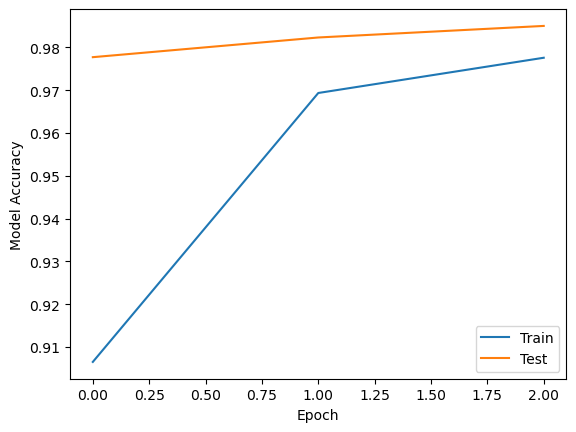

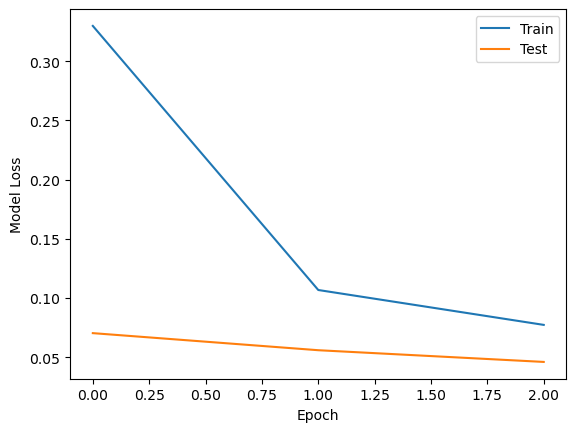

In [62]:
# Evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Look into training history
if 'accuracy' in history.history:
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Model Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

if 'loss' in history.history:
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Model Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()


In [63]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d_16
1 max_pooling2d_16
2 batch_normalization_16
3 conv2d_17
4 max_pooling2d_17
5 batch_normalization_17
6 dropout_16
7 flatten_8
8 dense_24
9 dropout_17
10 dense_25
11 dense_26


(5, 5, 1, 64)


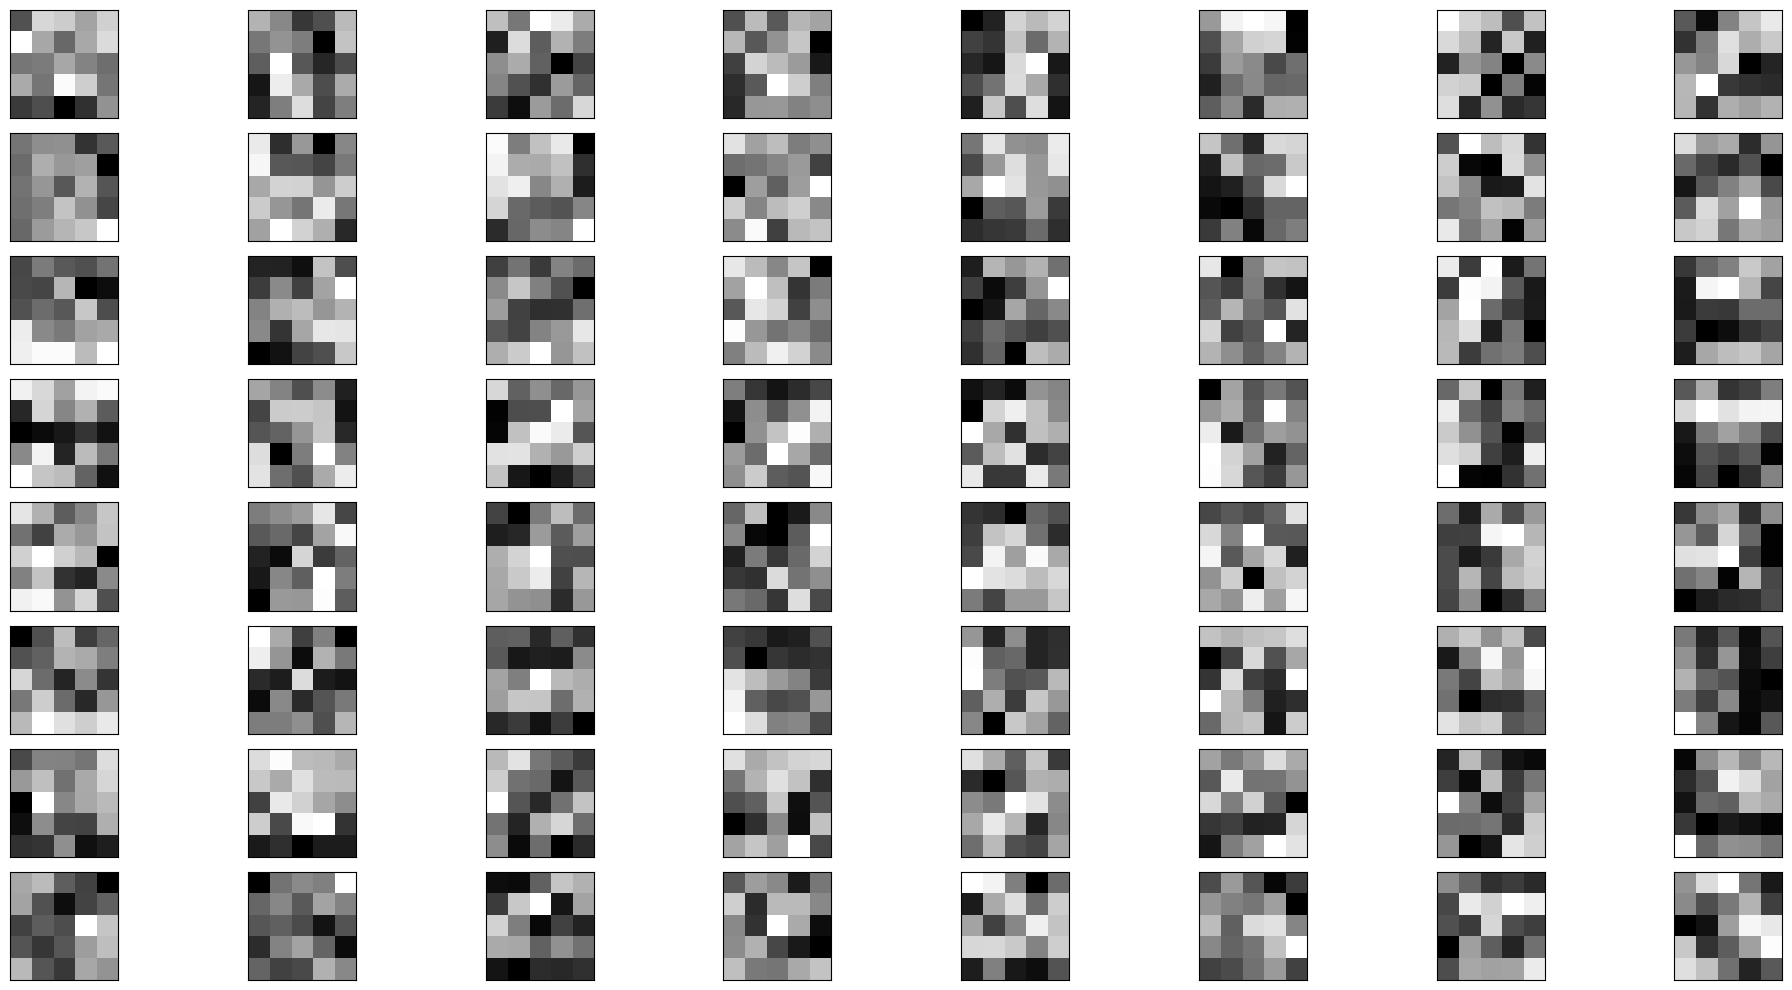

In [64]:
import matplotlib.pyplot as plt

# layer_index should be the index of a convolutional layer
layer_index = 0

# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

print(filters.shape)

# plot filters
n_filters = filters.shape[3]
n_rows = 8
n_cols = n_filters // n_rows
plt.figure(figsize=(20, 10))

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn off axis
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')

# adjust the spacing between subplots
plt.tight_layout()

# show the figure
plt.show()


In [65]:
from PIL import Image
import os

digit_filename = "numeri/nove.png" #selezionare il file da leggere
digit_in = Image.open(digit_filename).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

Image size: 28x28


1/1 [==============================] - 0s 37ms/step


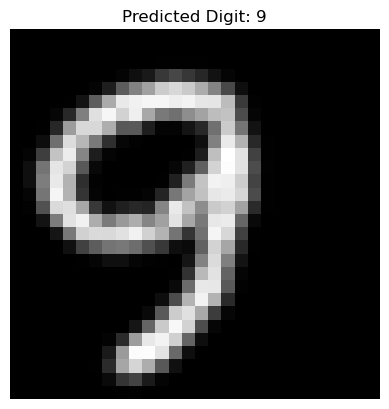

In [66]:
# Convert image to NumPy array
data = np.array(digit_in)
data = np.expand_dims(data, axis=0)  
data = np.expand_dims(data, axis=-1) 

# Make prediction
prediction = model_CNN.predict(data)
predicted_label = np.argmax(prediction)

# Display the image and predicted label
plt.imshow(digit_in, cmap='gray')
plt.title("Predicted Digit: {}".format(predicted_label))
plt.axis('off')
plt.show()


